**手写图片转为灰度图得到数据集**
读取拍照上传的图片，保存在0-9共10个文件夹，文件夹名对应label，将rgb图转为灰度图，之后得到784个像素数据
读取拍照上传的图片，保存在0-9共10个文件夹，文件夹名对应label，将rgb图转为灰度图，之后得到784个像素数据

In [3]:
import os
from PIL import Image
import pandas as pd
from tqdm import tqdm


name = './data/training-images'

data_image = []
data_label = []

for dirname in os.listdir(name):
	path = os.path.join(name, dirname)
	FileList = []
	for filename in os.listdir(path):
		if filename.endswith(".png"):
		    FileList.append(os.path.join(name, dirname, filename))
	for filename in tqdm(FileList, desc=dirname):
		img = Image.open(filename).convert('L')  # Convert to grayscale
		img = img.resize((28, 28))  # Resize to 28x28 pixels
        
        # Flatten the image into a 1D array
		pixel_values = list(img.getdata())
		pixel_values = [255 - x for x in pixel_values]
		data_image.append(pixel_values)
        
		label = dirname
		data_label.append(label)
        

print(len(data_label))
print(len(data_image))

df = pd.DataFrame(data_image)
df['label'] = data_label

df.to_csv('./data/mnist_data.csv', index=False, header=False)


print('finished')

9: 100%|██████████| 48/48 [00:00<00:00, 1919.41it/s]


548
548
finished


113.png
135.png
19.png
['./easy_mistake\\113.png', './easy_mistake\\135.png', './easy_mistake\\19.png']
finished


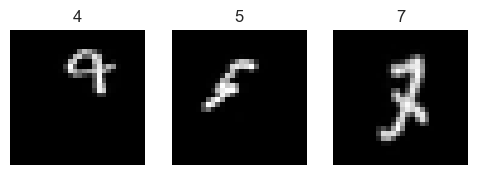

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
cols, rows = 4,1

p = [4, 5, 7]
i = 0

FileList = []

path = './easy_mistake'
for filename in os.listdir(path):
	print(filename)
	if filename.endswith(".png"):
		FileList.append(os.path.join(name, filename))
print(FileList)
for filename in FileList:
	img = Image.open(filename).convert('L')  # Convert to grayscale
	img = img.resize((28, 28))  # Resize to 28x28 pixels
	pixel_values = list(img.getdata())
	pixel_values = [255 - x for x in pixel_values]
	i += 1
	fig.add_subplot(rows,cols,i)
	plt.title(p[i - 1])
	plt.axis('off')
	inverted_img = np.array(Image.new('L', img.size, color=255)) - np.array(img)
	inverted_img = Image.fromarray(np.uint8(inverted_img))
	plt.imshow(inverted_img, cmap='gray')
        
print('finished')